# Clustering

## Loading data

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import *
from sklearn.decomposition import PCA

In [2]:
clustering_data=joblib.load('C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\data\\cleaned_superstore_data.csv')

In [3]:
clustering_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   category      
 4   Customer ID    9994 non-null   object        
 5   Segment        9994 non-null   category      
 6   City           9994 non-null   object        
 7   State          9994 non-null   object        
 8   Region         9994 non-null   category      
 9   Product ID     9994 non-null   object        
 10  Category       9994 non-null   category      
 11  Sub-Category   9994 non-null   category      
 12  Sales          9994 non-null   float64       
 13  Quantity       9994 non-null   int64         
 14  Discount       9994 non-null   float64       
 15  Profit         9994 n

## Feature engineering

In [4]:
customer_df = clustering_data.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Order ID': 'nunique'
}).rename(columns={'Order ID': 'Total_Orders'}).reset_index()

In [5]:
customer_df

,Customer ID,Sales,Profit,Quantity,Discount,Total_Orders
0,AA-10315,5563.560,-362.8825,30,0.090909,5
1,AA-10375,1056.390,277.3824,41,0.080000,9
2,AA-10480,1790.512,435.8274,36,0.016667,4
3,AA-10645,5086.935,857.8033,64,0.063889,6
4,AB-10015,886.156,129.3465,13,0.066667,3
...,...,...,...,...,...,...
788,XP-21865,2374.658,621.2300,100,0.046429,11
789,YC-21895,5454.350,1305.6290,31,0.075000,5
790,YS-21880,6720.444,1778.2923,58,0.050000,8
791,ZC-21910,8025.707,-1032.1490,105,0.254839,13


In [6]:
customer_df.describe()

,Sales,Profit,Quantity,Discount,Total_Orders
count,793.000000,793.000000,793.000000,793.000000,793.000000
mean,2896.848500,361.156396,47.759142,0.157482,6.316520
std,2628.670117,894.261812,24.842915,0.089071,2.550885
min,4.833000,-6626.389500,2.000000,0.000000,1.000000
25%,1146.050000,36.613100,30.000000,0.090909,5.000000
50%,2256.394000,227.833800,44.000000,0.150000,6.000000
75%,3785.276000,560.007800,63.000000,0.211111,8.000000
max,25043.050000,8981.323900,150.000000,0.700000,17.000000


In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   793 non-null    object 
 1   Sales         793 non-null    float64
 2   Profit        793 non-null    float64
 3   Quantity      793 non-null    int64  
 4   Discount      793 non-null    float64
 5   Total_Orders  793 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 37.3+ KB


## Data preparation

In [8]:
customer_id=customer_df['Customer ID']
x=customer_df.drop('Customer ID',axis=1)

In [9]:
# Standard scaling

columns=x.columns

ss=StandardScaler()
scaled_x=ss.fit_transform(x)

scaled_x=pd.DataFrame(scaled_x,columns=columns)

In [10]:
scaled_x.describe()

,Sales,Profit,Quantity,Discount,Total_Orders
count,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02
mean,3.136065e-17,-4.704098e-17,-8.960186e-17,1.344028e-16,8.064167e-17
std,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00
min,-1.100876e+00,-7.818690e+00,-1.843102e+00,-1.769169e+00,-2.085502e+00
25%,-6.664600e-01,-3.631466e-01,-7.153086e-01,-7.478848e-01,-5.164289e-01
50%,-2.437958e-01,-1.491809e-01,-1.514120e-01,-8.405027e-02,-1.241606e-01
75%,3.381893e-01,2.225041e-01,6.138763e-01,6.024795e-01,6.603760e-01
max,8.430186e+00,9.645506e+00,4.118091e+00,6.094718e+00,4.190791e+00


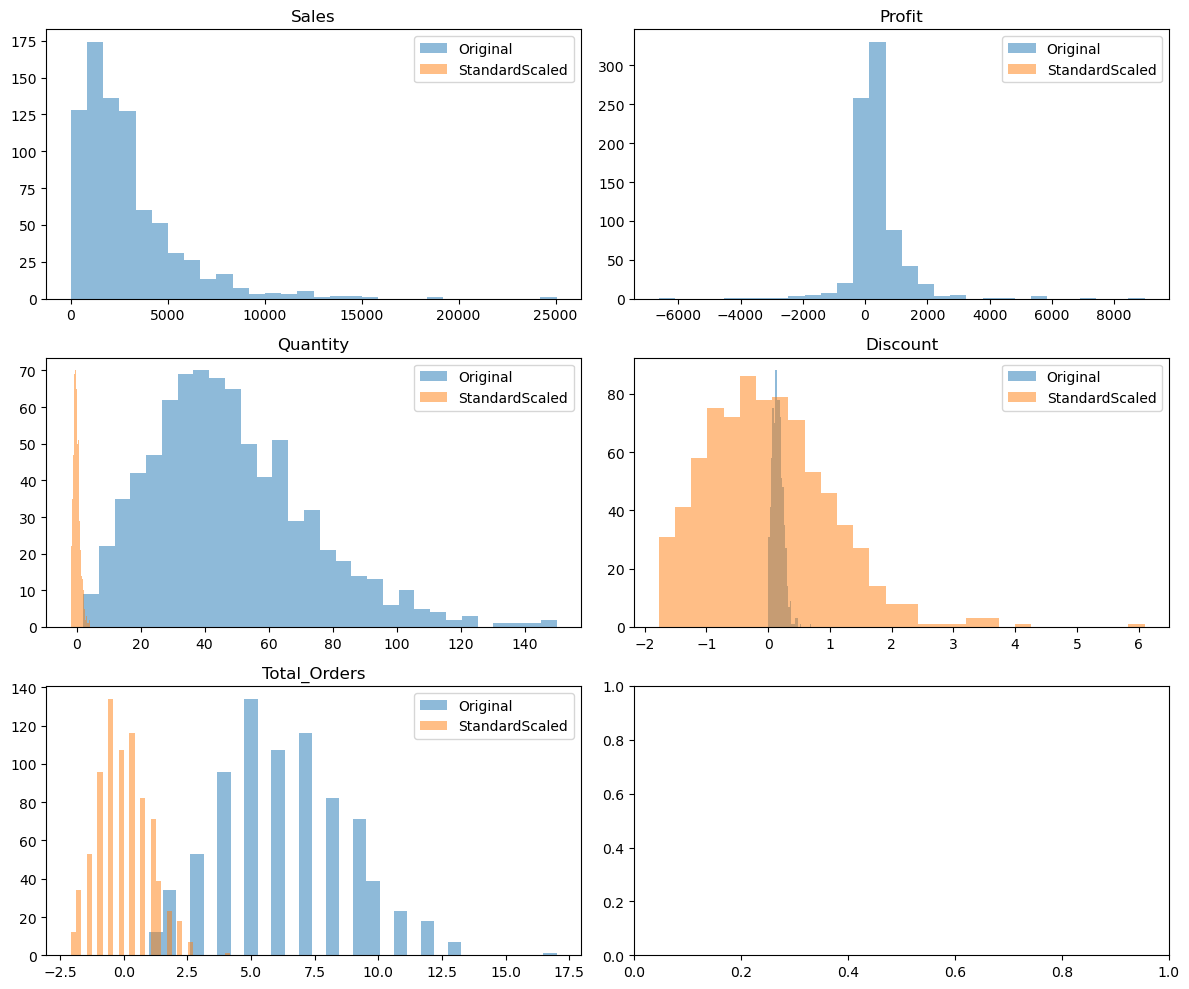

In [11]:
fig,axes=plt.subplots(3,2,figsize=(12,10))
axes=axes.flatten()

for i,col in enumerate(columns):
    axes[i].hist(customer_df[col],bins=30,alpha=0.5,label='Original')
    axes[i].hist(scaled_x[col],bins=30,alpha=0.5,label='StandardScaled')
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()

## Clustering

In [38]:
clusters=[2,3,4,5,6,7,8,9,10]
ssd=[]
sil_score=[]

for k in clusters:
    model=KMeans(n_clusters=k,max_iter=150,random_state=42)
    model.fit(scaled_x)
    labels=model.predict(scaled_x)
    sil_score.append(silhouette_score(scaled_x,labels))
    ssd.append(model.inertia_)

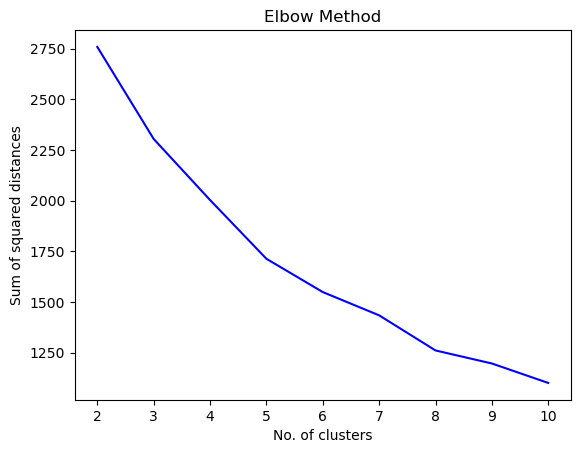

In [39]:
# Elbow method to find k

plt.plot(clusters,ssd,color='blue')
plt.xlabel('No. of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

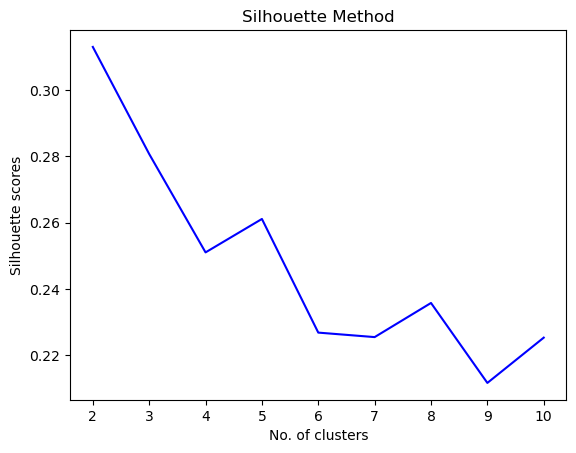

In [41]:
# silhouette method to find k

plt.plot(clusters,sil_score,color='blue')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette scores')
plt.title('Silhouette Method')
plt.show()

In [54]:
scores_df=pd.DataFrame({
    'k':clusters,
    'SSD':ssd,
    'Silhouette_score':sil_score
})

scores_df.set_index('k',inplace=True)

In [60]:
scores_df

,SSD,Silhouette_score
k,,
2,2758.060685,0.312978
3,2304.153847,0.280694
4,2003.068426,0.251026
5,1713.260303,0.261106
6,1549.028681,0.226838
7,1434.301980,0.225485
8,1261.137475,0.235777
9,1196.749311,0.211668
10,1100.936161,0.225318


## Trying to reduce dimensionality

In [11]:
pca=PCA().fit(scaled_x)
cum_sum=np.cumsum(pca.explained_variance_ratio_)
n=np.where(cum_sum>0.95)[0][1]

In [12]:
pca_model=PCA(n_components=n)
pca_x=pca_model.fit_transform(scaled_x)

pca_x=pd.DataFrame(pca_x,columns=[f'PC{i+1}' for i in range(n)])

In [13]:
pca_x

,PC1,PC2,PC3,PC4
0,-0.345919,-0.567304,-0.095718,1.492347
1,0.101751,-0.178850,-1.233988,-0.622204
2,-0.732965,-1.530276,-0.828548,0.307213
3,1.064663,-0.967872,-0.231302,0.534871
4,-1.826230,-1.331649,-0.402049,0.256906
...,...,...,...,...
788,2.282899,0.280533,-1.894690,-0.606609
789,0.360064,-1.717289,0.548510,0.385953
790,2.056316,-1.526275,0.156096,0.085141
791,2.959831,2.990699,-0.450301,1.193678


In [14]:
clusters=[2,3,4,5,6,7,8,9,10]
ssd=[]
sil_score=[]

for k in clusters:
    model=KMeans(n_clusters=k,max_iter=150,random_state=42)
    model.fit(pca_x)
    labels=model.predict(pca_x)
    sil_score.append(silhouette_score(pca_x,labels))
    ssd.append(model.inertia_)

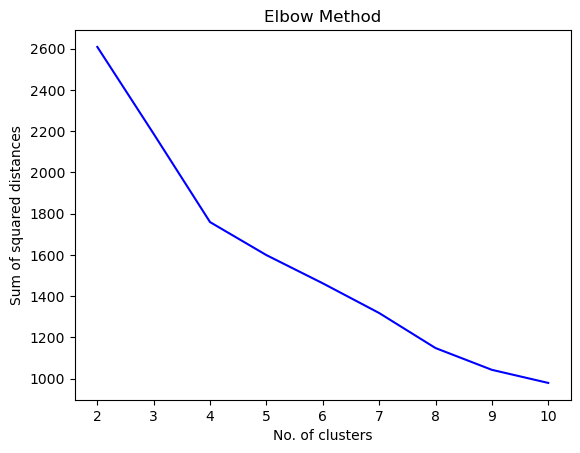

In [15]:
# Elbow method to find k

plt.plot(clusters,ssd,color='blue')
plt.xlabel('No. of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')

plt.savefig('elbow_plot.png', bbox_inches='tight')
plt.show()

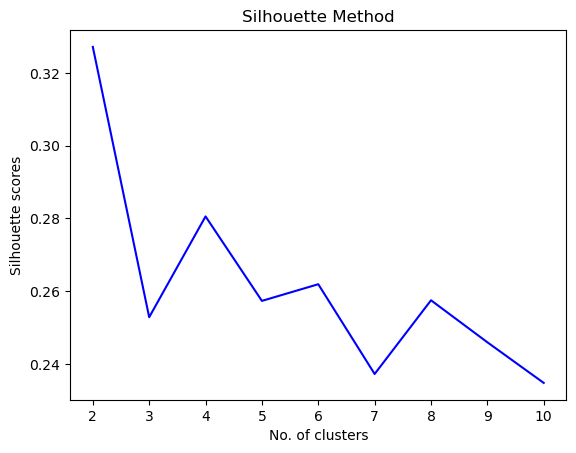

In [16]:
# silhouette method to find k

plt.plot(clusters,sil_score,color='blue')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette scores')
plt.title('Silhouette Method')

plt.savefig('silhouette_plot.png', bbox_inches='tight')
plt.show()

In [17]:
scores_df=pd.DataFrame({
    'k':clusters,
    'SSD':ssd,
    'Silhouette_score':sil_score
})

scores_df.set_index('k',inplace=True)

In [18]:
scores_df

,SSD,Silhouette_score
k,,
2,2608.924629,0.327145
3,2187.046770,0.252870
4,1758.982743,0.280566
5,1598.878751,0.257355
6,1461.994553,0.261933
7,1317.928776,0.237263
8,1147.927058,0.257521
9,1042.239331,0.245979
10,978.717774,0.234809


## Final Kmeans model

In [19]:
final_model=KMeans(n_clusters=4,max_iter=150,random_state=42)
final_model.fit(pca_x)

cluster_labels=final_model.labels_

## Visualization and analysis

In [20]:
customer_df['Clusters']=cluster_labels
customer_df['Customer ID']=customer_id

In [21]:
pca_x['Clusters']=cluster_labels

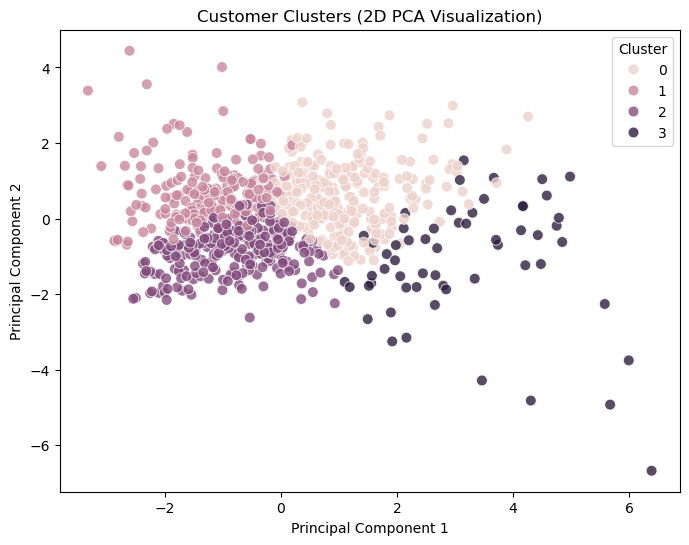

In [22]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=pca_x,x='PC1',y='PC2',hue='Clusters',s=60,alpha=0.8)

plt.title('Customer Clusters (2D PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

plt.savefig('PCA_Clusters.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
cluster_summary=customer_df.groupby('Clusters')[['Sales','Profit','Quantity','Discount','Total_Orders']].mean().round(2)
cluster_summary['Total_Orders']=np.ceil(cluster_summary['Total_Orders'])

In [31]:
cluster_summary

,Sales,Profit,Quantity,Discount,Total_Orders
Clusters,,,,,
0,3649.82,333.97,68.87,0.16,9.0
1,1579.21,-98.41,31.91,0.26,5.0
2,1764.41,315.27,33.45,0.09,5.0
3,9379.48,2235.05,74.81,0.12,9.0


## Saving results

### 1.Model

In [26]:
file_name='Kmeans.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Clustering'
full_path=os.path.join(file_path,file_name)

joblib.dump(final_model,full_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Clustering\\Kmeans.joblib'

### 2.Results dataframe

In [27]:
file_name='cluster_dataframe.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Clustering'
full_path=os.path.join(file_path,file_name)

joblib.dump(customer_df,full_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Clustering\\cluster_dataframe.joblib'

In [28]:
file_name='cluster_summary.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Clustering'
full_path=os.path.join(file_path,file_name)

joblib.dump(cluster_summary,full_path)

NameError: name 'cluster_summary' is not defined

### 3.Inference

Inference:

Cluster 3 – Premium Customers 
Highest Sales (₹9379) and Profit (₹2235) with moderate discounts → very profitable and loyal segment.

Cluster 0 – High-Value Buyers 
Good Sales (₹3649) and Profit (₹334) with average discounts → steady, reliable customers.

Cluster 2 – Value-Conscious Customers 
Moderate Sales (₹1764) and Profit (₹315) with lowest discounts (0.09) → efficient and profitable at smaller scale.

Cluster 1 – Discount-Driven Customers 
Low Profit (−₹98) and relatively high discounts (0.26) → least profitable segment, likely price-sensitive.

### 4.SSD vs Silhouette score

In [136]:
file_name='SSD_vs_silhouette.joblib'
file_path=r'C:\Users\CSC\Documents\Portfolio\Superstore project\Saved models\Clustering'
full_path=os.path.join(file_path,file_name)

joblib.dump(scores_df,full_path)

['C:\\Users\\CSC\\Documents\\Portfolio\\Superstore project\\Saved models\\Clustering\\SSD_vs_silhouette.joblib']